### Importing Necessary Libraries
We start by importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

### Setting the File Path
We define the path to the CSV file that contains data on actors' sentiment and popularity scores.
This file is used as input to load and analyze data.


In [5]:
PATH='../../output_data/actor_sentiment_popularity_scores.csv'

### Defining the Plotting Function
The function `plot_sentiment_and_popularity` takes a dataframe and an optional parameter to filter out actors with zero sentiment. It creates a scatter plot of sentiment versus popularity scores, with an interactive cursor.

#### Parameters:
- `df`: Dataframe containing the actor data with sentiment and popularity scores.
- `remove_zero_sentiment`: Boolean flag to filter out actors with zero sentiment scores.


In [3]:
def plot_sentiment_and_popularity(df, remove_zero_sentiment=True):
    # Filter out actors with a sentiment score of 0
    if (remove_zero_sentiment):
        df = df[df['sentiment'] != 0]
    plt.figure(figsize=(12, 8))

    # Calculate the average popularity for the horizontal line
    average_popularity = df['popularity'].mean()

    # Scatter plot with sentiment score on x-axis and popularity on y-axis
    scatter = plt.scatter(df['sentiment'], df['popularity'], color='skyblue', s=50, alpha=0.6, edgecolor='gray')

    # Add vertical and horizontal lines
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)  # Vertical line at x=0
    plt.axhline(y=average_popularity, color='gray', linestyle='--', alpha=0.7)  # Horizontal line at average popularity

    # Set labels and title
    plt.xlabel('Sentiment Score')
    plt.ylabel('Popularity')
    plt.title('Sentiment Score vs. Popularity of Actors')
    plt.xlim(-1, 1)
    plt.ylim(df['popularity'].min(), df['popularity'].max())
    plt.grid(True, linestyle='--', alpha=0.7)

    # Enable hover annotation with mplcursors
    cursor = mplcursors.cursor(scatter, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(df['actor'].iloc[sel.index]))

    plt.show()


### Loading the Data and Plotting
We load the CSV data into a dataframe, then call `plot_sentiment_and_popularity` to visualize the relationship between actors' sentiment and popularity scores.


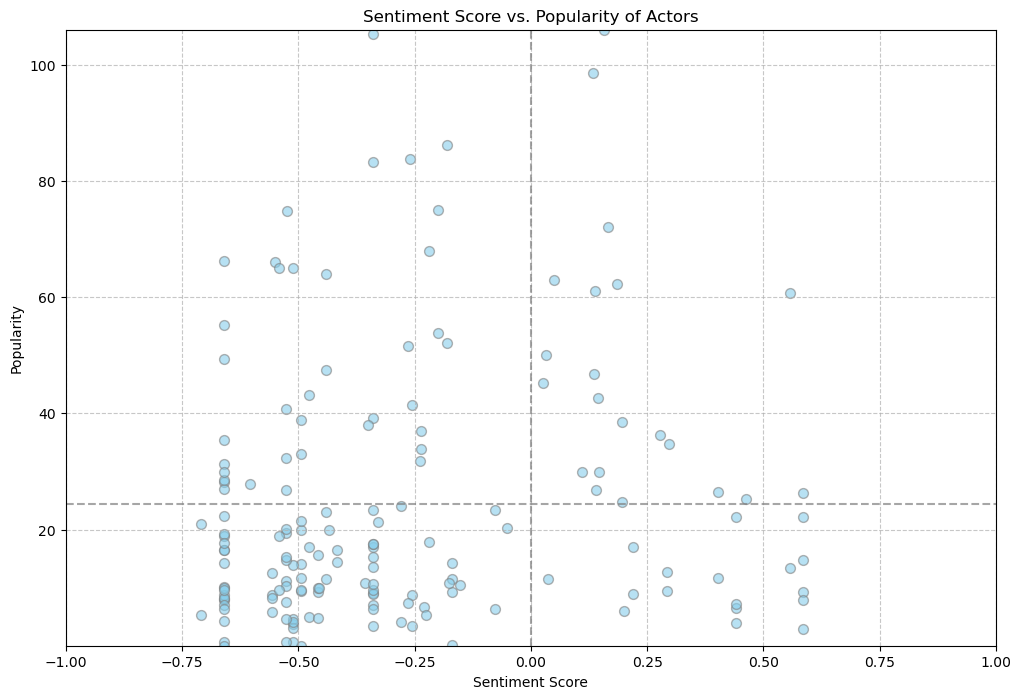

In [6]:
# Load the data and plot the sentiment and popularity scores
df = pd.read_csv(PATH)
plot_sentiment_and_popularity(df)

This plot showcases the density of actors depending on the received sentiment scores of the characters they played and their popularity. The sentiment score was computed based on sentiment analysis on the tvtropes file.